In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

import soundfile as sf
import os, glob, pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

(1761, 173)
Accuracy of the Recognizer is: 63.9%
              precision    recall  f1-score   support

    Negative       0.66      0.53      0.59       116
     Neutral       0.70      0.79      0.74       231
    Positive       0.43      0.41      0.42        94

    accuracy                           0.64       441
   macro avg       0.60      0.58      0.58       441
weighted avg       0.63      0.64      0.63       441



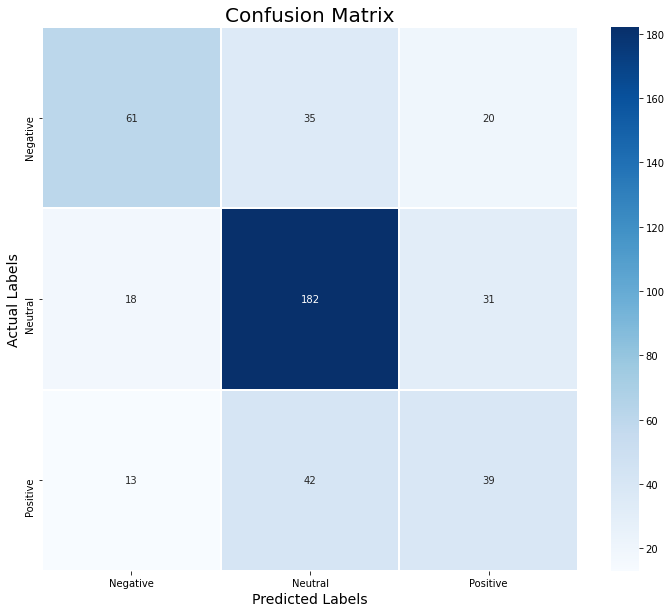

In [2]:
data_path = pd.read_csv("data_path.csv")
data_path.head()

Features = pd.read_csv("fs_27_07.csv")
print(Features.shape)
Features

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

encoder = OneHotEncoder()

# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

model = MLPClassifier(hidden_layer_sizes=(200,), learning_rate='adaptive', max_iter=400)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy of the Recognizer is: {:.1f}%".format(accuracy*100))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = ["Negative", "Neutral", "Positive"] , columns = ["Negative", "Neutral", "Positive"])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()